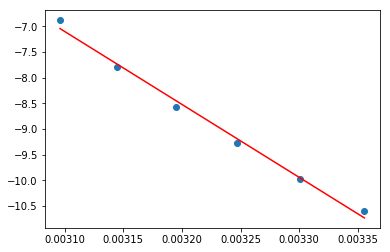

gradient: -14192.4097826
intercept 36.8926843536
r-squared: 0.992585070338
delHsub: 117.995694933
delSsub: 306.725777716
P298: 2.18163290496e-05


In [4]:
import numpy as np
import matplotlib.pyplot as plt
def VP_function (R, B_R, S, B_S, T, ICSR, ICSS):
    MZ = R[:,0]
    RIC = R[:,1]
    B_RIC = B_R[1]
    CRIC = RIC - B_RIC
    INT = np.trapz(CRIC,MZ)
    PR = np.exp(-11058.97/T+29.54)
    CF = PR/(INT/ICSR)
    SIC = S[:,1]
    B_SIC = B_S[1]
    CSIC = SIC-B_SIC
    SINT = np.trapz(CSIC,MZ)
    PS = CF*(SINT/ICSS)
    return PS

T1 = 298
T2 = 303
T3 = 308
T4 = 313
T5 = 318
T6 = 323

PS25 = VP_function(np.loadtxt("malonic_acid_25c.asc", skiprows=2581), np.loadtxt("malonic_acid_background.asc", skiprows=14100), np.loadtxt("mannitol_25c.asc", skiprows=2581), np.loadtxt("mannitol_gate_open.asc", skiprows=14100), T1, 12.457, 23.136)
PS30 = VP_function(np.loadtxt("malonic_acid_30c.asc", skiprows=2581), np.loadtxt("malonic_acid_background.asc", skiprows=14100), np.loadtxt("mannitol_30c.asc", skiprows=2581), np.loadtxt("mannitol_gate_open.asc", skiprows=14100), T2, 12.457, 23.136)
PS35 = VP_function(np.loadtxt("malonic_acid_35c.asc", skiprows=2581), np.loadtxt("malonic_acid_background.asc", skiprows=14100), np.loadtxt("mannitol_35c.asc", skiprows=2581), np.loadtxt("mannitol_gate_open.asc", skiprows=14100), T3, 12.457, 23.136)
PS40 = VP_function(np.loadtxt("malonic_acid_40c.asc", skiprows=2581), np.loadtxt("malonic_acid_background.asc", skiprows=14100), np.loadtxt("mannitol_40c.asc", skiprows=2581), np.loadtxt("mannitol_gate_open.asc", skiprows=14100), T4, 12.457, 23.136)
PS45 = VP_function(np.loadtxt("malonic_acid_45c.asc", skiprows=2581), np.loadtxt("malonic_acid_background.asc", skiprows=14100), np.loadtxt("mannitol_45c.asc", skiprows=2581), np.loadtxt("mannitol_gate_open.asc", skiprows=14100), T5, 12.457, 23.136)
PS50 = VP_function(np.loadtxt("malonic_acid_50c.asc", skiprows=2581), np.loadtxt("malonic_acid_background.asc", skiprows=14100), np.loadtxt("mannitol_50c.asc", skiprows=2581), np.loadtxt("mannitol_gate_open.asc", skiprows=14100), T6, 12.457, 23.136)

X =[1/T1, 1/T2, 1/T3, 1/T4, 1/T5, 1/T6]
Y=[np.log(PS25), np.log(PS30), np.log(PS35), np.log(PS40), np.log(PS45), np.log(PS50)]
import scipy.stats
slope, intercept, r_value, P_value, std_err = scipy.stats.linregress(X,Y)
x = np.array([1/T1, 1/T2, 1/T3, 1/T4, 1/T5, 1/T6])
y = np.array([np.log(PS25), np.log(PS30), np.log(PS35), np.log(PS40), np.log(PS45), np.log(PS50)])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y)[0]
plt.plot(x, y, 'o')
plt.plot(x, m*x + c, 'r')
plt.show()

print('gradient:', m) 
print('intercept', c)
print('r-squared:', r_value*r_value)
R =  8.314
delHsub = R/1000*-m
delSsub = R*c
P298 = np.exp(-delHsub*1000/(R*298)+delSsub/R)
print('delHsub:', delHsub)
print('delSsub:', delSsub)
print('P298:', P298)